In [5]:
import pandas as pd

In [6]:
import pandas as pd

df = pd.read_csv("fct_invoice.csv")
df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [7]:
jsondf = pd.read_json(r'dim_customer.json')
jsondf.head()

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


In [8]:
#easy question 1
unique_count = jsondf['id'].nunique()
print("There are", unique_count, "unique customers.")





There are 5191 unique customers.


In [9]:
#easy question 2
category_type = df['category'].unique()

print("These are the different categories: ", category_type)


category_num = df['category'].nunique()

print("There are ", category_num, "unique categories")


These are the different categories:  ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
There are  8 unique categories


In [10]:
#easy question 3
popular = df['payment_method'].value_counts()
popular_method = popular.index[0]
num_times = popular[0]
print("The most popular payment method is", popular_method)
print("It was used", num_times, "times")

The most popular payment method is Cash
It was used 44447 times


In [11]:
df = df.rename(columns={'customer_id': 'id'})
df["sales"] = df["quantity"] * df["price"]

In [12]:
df

,invoice_no,id,category,quantity,price,payment_method,invoice_date,shopping_mall,sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [13]:
new_df = pd.merge(df, jsondf, on='id')


print(new_df)

      invoice_no    id   category  quantity    price payment_method  \
0        I138884   229   Clothing         5  1500.40    Credit Card   
1        I126377   229  Cosmetics         2    81.32    Credit Card   
2        I178419   229      Shoes         3  1800.51     Debit Card   
3        I847727   229   Clothing         3   900.24    Credit Card   
4        I219251   229      Shoes         5  3000.85    Credit Card   
...          ...   ...        ...       ...      ...            ...   
99452    I198027  4973      Shoes         1   600.17           Cash   
99453    I989120  6161      Books         5    75.75           Cash   
99454    I791963  6779   Clothing         5  1500.40    Credit Card   
99455    I100582  8386   Clothing         2   600.16           Cash   
99456    I934204  4761  Cosmetics         4   162.64           Cash   

      invoice_date   shopping_mall     sales   age first_name gender last_name  
0         5/8/2022          Kanyon   7502.00   NaN    William     

In [14]:
#medium question 1
x = df.groupby ("category")["sales"].sum()
highest_categories = x.nlargest(3)
print(highest_categories)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64


In [15]:
#medium question 2
above45 = new_df[new_df['age'] > 45]
total_sales = above45['sales'].sum()
print(total_sales)

82039768.15


Sales tends to spike on early October and early July. Smaller increases on May as well as a few days before January likely due to Christmas.
Sales tend to drop around February and November. Smaller decreases on June


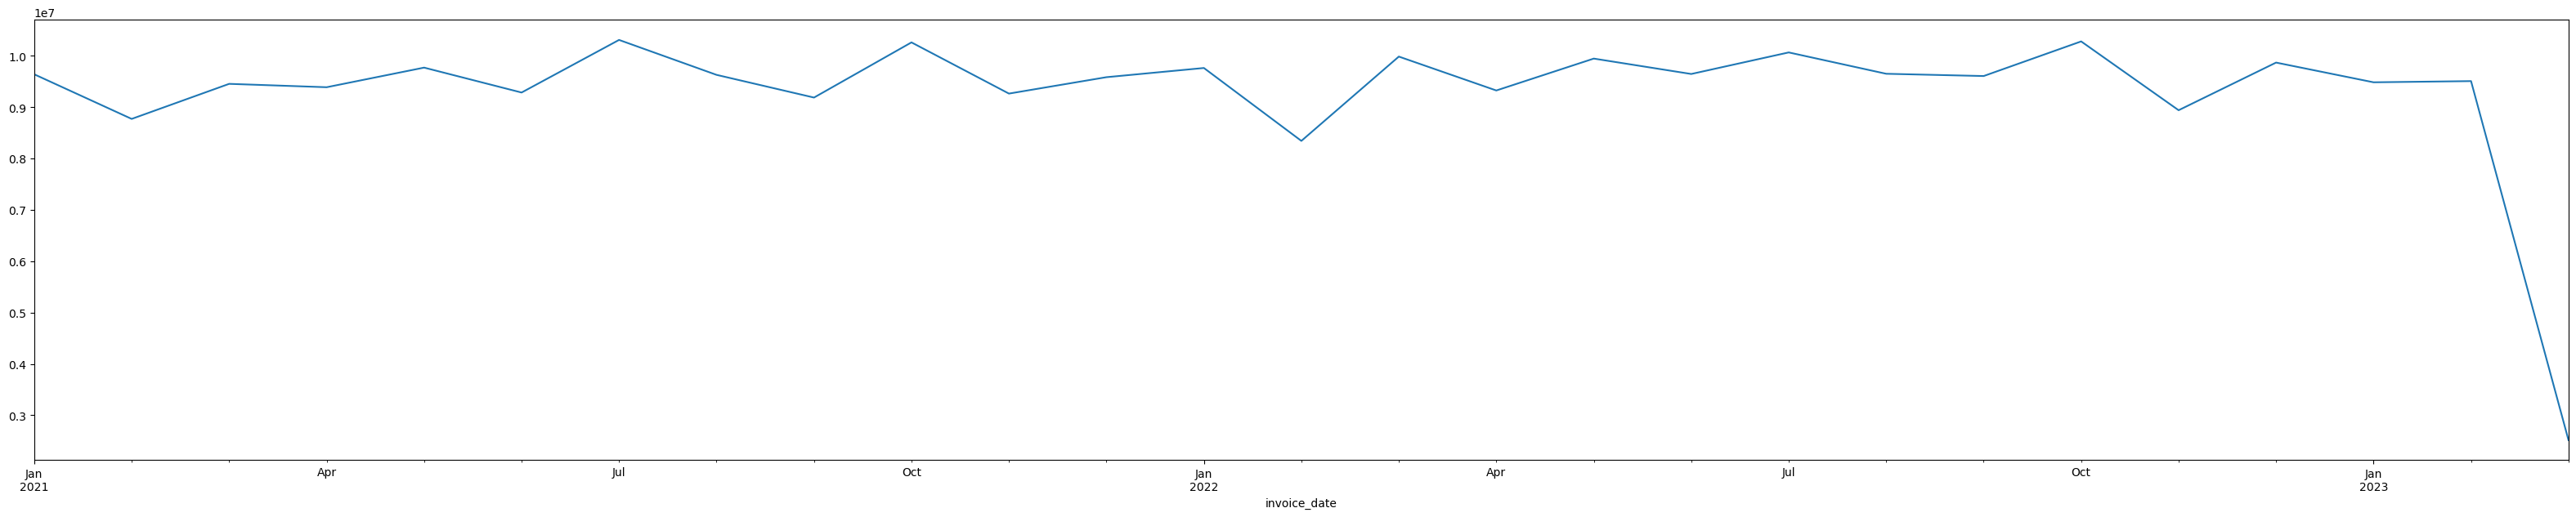

In [16]:
#medium question 3
import matplotlib.pyplot as plt
new_df["invoice_date"] = pd.to_datetime(new_df["invoice_date"], dayfirst=True)
grouped = new_df.groupby (new_df["invoice_date"].dt.to_period('M'))["sales"].sum()
grouped.plot(kind='line', figsize=(40, 7), x='Invoice Month', y='Total Sales')


plt.show

print("Sales tends to spike on early October and early July. Smaller increases on May as well as a few days before January likely due to Christmas.")
print("Sales tend to drop around February and November. Smaller decreases on June")





In [17]:
#hard question 1
import numpy as np
from sklearn.datasets import fetch_openml

conditions = [
(new_df['age']>=10) & (new_df["age"] <20),
(new_df['age']>=20) & (new_df["age"] <30), 
(new_df['age']>=30) & (new_df["age"] <40), 
(new_df['age']>=40) & (new_df["age"] <50),
(new_df['age']>=50) & (new_df["age"] <60), 
(new_df['age']>=60) & (new_df["age"] <70),
(new_df['age']>=70) & (new_df["age"] <80), 
(new_df['age']>=80) & (new_df["age"] <90), 
(new_df['age']>=90) & (new_df["age"] <100), 
(new_df['age']>=100) & (new_df["age"] <110),
np.isnan(new_df['age'])
]

values = ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '100s', 'NaN']
new_df["age_group"]= np.select(conditions,values,default = '')

pivot = np.round(pd.pivot_table(new_df, values = 'sales',
                               index = ['age_group'],
                               columns = ['category'],
                                aggfunc=np.sum
                               ))
pivot

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
age_group,,,,,,,,
10s,12802.0,1927414.0,109619.0,13582.0,993281.0,12375.0,1129800.0,60426.0
20s,79462.0,10250733.0,605915.0,73492.0,5924878.0,54943.0,5261550.0,385101.0
30s,84143.0,11354127.0,723545.0,87247.0,7200840.0,64093.0,6159300.0,420582.0
40s,87203.0,11215190.0,665035.0,89553.0,7025590.0,66392.0,5954550.0,390907.0
50s,74962.0,10321852.0,587781.0,72425.0,5852858.0,54943.0,4435200.0,345068.0
60s,80477.0,10660642.0,649991.0,80976.0,5978894.0,55025.0,5471550.0,363955.0
70s,54828.0,7769371.0,419083.0,55051.0,4480269.0,38674.0,3638250.0,273244.0
80s,26664.0,4493698.0,254532.0,31333.0,2628745.0,23718.0,1946700.0,153933.0
NaN,334012.0,46003764.0,2777363.0,345876.0,26468097.0,265661.0,23865450.0,1587210.0
